In [1]:
import mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies=pd.read_csv('D:\dinesh document\EXCELR\Data Science\Assingment\Association Rule assignment\my_movies.csv')

### EDA

In [3]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
movies.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

### Association

In [7]:
df=pd.get_dummies(movies)
df.head(2)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [8]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets.head(2)

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(Harry Potter1, V3_Harry Potter1, Green Mile, ...","(Sixth Sense, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
52635,"(LOTR2, LOTR1, V5_LOTR2, V1_Sixth Sense)","(Sixth Sense, V2_LOTR1, Green Mile, V4_Green M...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33413,"(V4_Green Mile, V5_LOTR2)","(Sixth Sense, LOTR2, Harry Potter1, V2_LOTR1, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(V5_LOTR2, LOTR1)","(Sixth Sense, LOTR2, Harry Potter1, V2_LOTR1, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(Harry Potter1, LOTR2)","(Sixth Sense, V5_LOTR2, V2_LOTR1, V4_Green Mil...",0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
1589,"(Sixth Sense, Gladiator)","(Green Mile, V1_Sixth Sense)",0.5,0.2,0.1,0.2,1.0,0.00,1.0
1630,"(V4_Green Mile, Green Mile)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
243,(V4_Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
240,"(Sixth Sense, Gladiator)",(V4_Green Mile),0.5,0.2,0.1,0.2,1.0,0.00,1.0


In [10]:
rules.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1589,"(Sixth Sense, Gladiator)","(Green Mile, V1_Sixth Sense)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
212,"(Sixth Sense, Gladiator)",(V1_Sixth Sense),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
205,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
202,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
240,"(Sixth Sense, Gladiator)",(V4_Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
243,(V4_Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
1590,"(Green Mile, V1_Sixth Sense)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
6269,"(Sixth Sense, Gladiator)","(V4_Green Mile, Green Mile, V1_Sixth Sense)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
6266,"(V4_Green Mile, Green Mile, V1_Sixth Sense)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
1629,"(Sixth Sense, Gladiator)","(V4_Green Mile, Green Mile)",0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


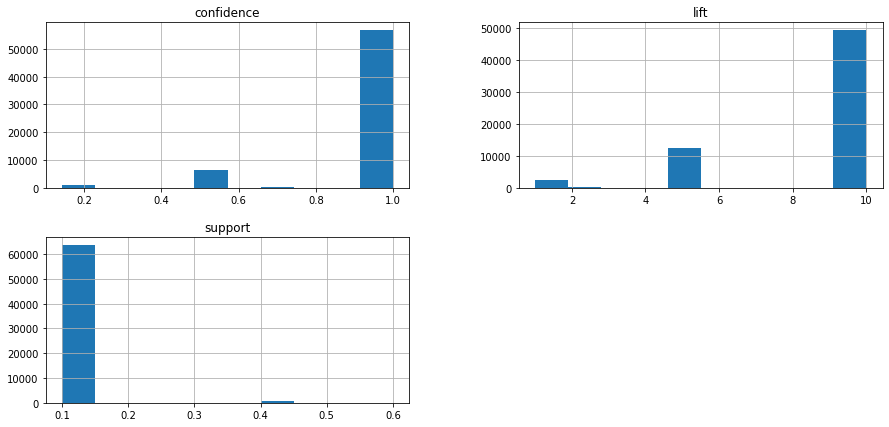

In [11]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

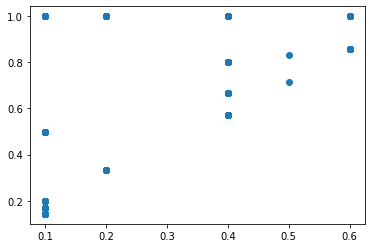

In [12]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

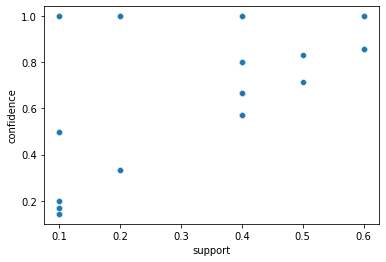

In [13]:
import seaborn as sns

sns.scatterplot('support', 'confidence', data=rules,)

plt.show()

In [14]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(Harry Potter1, V3_Harry Potter1, Green Mile, ...","(Sixth Sense, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
52635,"(LOTR2, LOTR1, V5_LOTR2, V1_Sixth Sense)","(Sixth Sense, V2_LOTR1, Green Mile, V4_Green M...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33413,"(V4_Green Mile, V5_LOTR2)","(Sixth Sense, LOTR2, Harry Potter1, V2_LOTR1, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(V5_LOTR2, LOTR1)","(Sixth Sense, LOTR2, Harry Potter1, V2_LOTR1, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(Harry Potter1, LOTR2)","(Sixth Sense, V5_LOTR2, V2_LOTR1, V4_Green Mil...",0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
1589,"(Sixth Sense, Gladiator)","(Green Mile, V1_Sixth Sense)",0.5,0.2,0.1,0.2,1.0,0.00,1.0
1630,"(V4_Green Mile, Green Mile)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
243,(V4_Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
240,"(Sixth Sense, Gladiator)",(V4_Green Mile),0.5,0.2,0.1,0.2,1.0,0.00,1.0


In [15]:
# Rules with confidence greater 1
rules[rules['confidence']>=1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
7,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
11,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
13,(V2_LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
15,(V2_LOTR1),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64203,"(V4_Green Mile, LOTR1)","(Sixth Sense, V5_LOTR2, V1_Sixth Sense, LOTR2,...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
64205,"(Green Mile, LOTR1)","(Sixth Sense, V5_LOTR2, V1_Sixth Sense, LOTR2,...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
64207,(V5_LOTR2),"(Sixth Sense, V1_Sixth Sense, LOTR2, Harry Pot...",0.1,0.1,0.1,1.0,10.000000,0.09,inf
64211,(V3_Harry Potter1),"(Sixth Sense, V5_LOTR2, V1_Sixth Sense, LOTR2,...",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [16]:
rules[rules['lift']>=10].shape

(49244, 9)

### There are 125 rules with confidence greather than 1.
### There are 42 rules with lift 10.

### Changing minimum support and confidence

In [22]:
frequent_itemsets1 = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets1.head(2)

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)


In [42]:
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.7)
rules1
rules1.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
189,"(V3_Sixth Sense, V1_Gladiator, Gladiator)",(Patriot),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
248,"(V3_Sixth Sense, V1_Gladiator)","(Sixth Sense, Patriot, Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
257,"(Sixth Sense, V2_Patriot, Gladiator)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
256,"(Sixth Sense, Patriot, Gladiator)","(V2_Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
255,"(V2_Patriot, V3_Sixth Sense, Patriot, Gladiator)",(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
243,"(Sixth Sense, Gladiator)","(V3_Sixth Sense, Patriot, V1_Gladiator)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
133,"(Sixth Sense, Gladiator)","(V2_Patriot, V3_Sixth Sense)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
225,"(Sixth Sense, Gladiator)","(V2_Patriot, Patriot, V1_Gladiator)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
94,"(Sixth Sense, Gladiator)","(Patriot, V1_Gladiator)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [69]:
rules1.shape

(378, 9)

In [43]:
rules1.sort_values('confidence')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
20,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
287,"(Sixth Sense, Gladiator)","(V2_Patriot, V3_Sixth Sense, V1_Gladiator)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
100,"(Sixth Sense, Gladiator)","(V2_Patriot, Patriot)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
94,"(Sixth Sense, Gladiator)","(Patriot, V1_Gladiator)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
116,"(Sixth Sense, Gladiator)","(V2_Patriot, V1_Gladiator)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
123,"(Sixth Sense, Gladiator)","(V3_Sixth Sense, V1_Gladiator)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
265,"(Sixth Sense, Gladiator)","(V2_Patriot, V3_Sixth Sense, Patriot)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
133,"(Sixth Sense, Gladiator)","(V2_Patriot, V3_Sixth Sense)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
22,"(Sixth Sense, Gladiator)",(V1_Gladiator),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


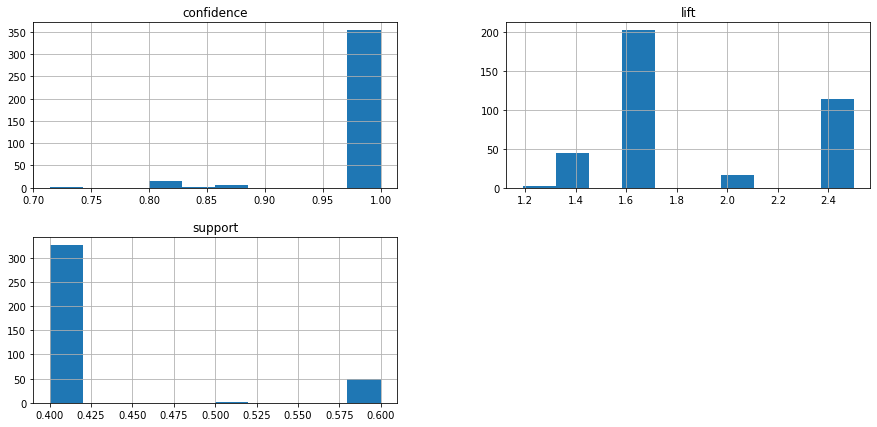

In [44]:
import matplotlib.pyplot as plt
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

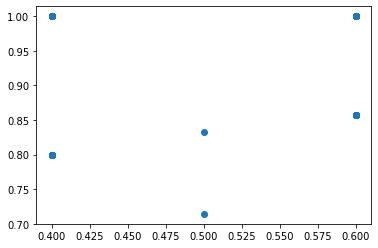

In [45]:
plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

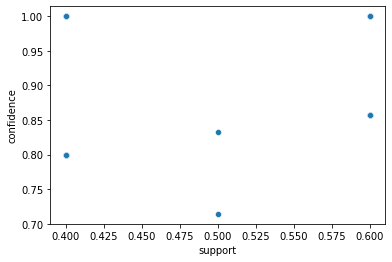

In [121]:
sns.scatterplot('support', 'confidence', data=rules1,)

plt.show()

In [47]:
rules1.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
189,"(V3_Sixth Sense, V1_Gladiator, Gladiator)",(Patriot),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
248,"(V3_Sixth Sense, V1_Gladiator)","(Sixth Sense, Patriot, Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
257,"(Sixth Sense, V2_Patriot, Gladiator)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
256,"(Sixth Sense, Patriot, Gladiator)","(V2_Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
255,"(V2_Patriot, V3_Sixth Sense, Patriot, Gladiator)",(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
243,"(Sixth Sense, Gladiator)","(V3_Sixth Sense, Patriot, V1_Gladiator)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
133,"(Sixth Sense, Gladiator)","(V2_Patriot, V3_Sixth Sense)",0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
225,"(Sixth Sense, Gladiator)","(V2_Patriot, Patriot, V1_Gladiator)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
94,"(Sixth Sense, Gladiator)","(Patriot, V1_Gladiator)",0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [50]:
# Rules with confidence greater 0.7
rules1[rules1['confidence']>=0.7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(V3_Sixth Sense),(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
373,"(V3_Sixth Sense, Gladiator)","(Sixth Sense, V2_Patriot, Patriot, V1_Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
374,"(V3_Sixth Sense, V1_Gladiator)","(Sixth Sense, V2_Patriot, Patriot, Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
375,"(V3_Sixth Sense, Patriot)","(Sixth Sense, V2_Patriot, V1_Gladiator, Gladia...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
376,"(V2_Patriot, V3_Sixth Sense)","(Sixth Sense, Patriot, V1_Gladiator, Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


In [70]:
rules1[rules1['confidence']>=0.7].shape

(378, 9)

### There are 378 rules with confidence greather than 0.7.

In [88]:
frequent_itemsets2 = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets2.head(2)

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)


In [89]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.8)
rules2
rules2.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(V2_Patriot, V1_Gladiator)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
32,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
45,"(Patriot, Gladiator)","(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
26,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
27,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
28,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
29,(V1_Gladiator),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
44,"(Patriot, V1_Gladiator)","(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
31,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [90]:
rules2.sort_values('confidence')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
30,(Gladiator),"(V2_Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
24,(Gladiator),"(V2_Patriot, Patriot)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
18,(Gladiator),"(Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
50,(Gladiator),"(V2_Patriot, Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
31,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
32,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


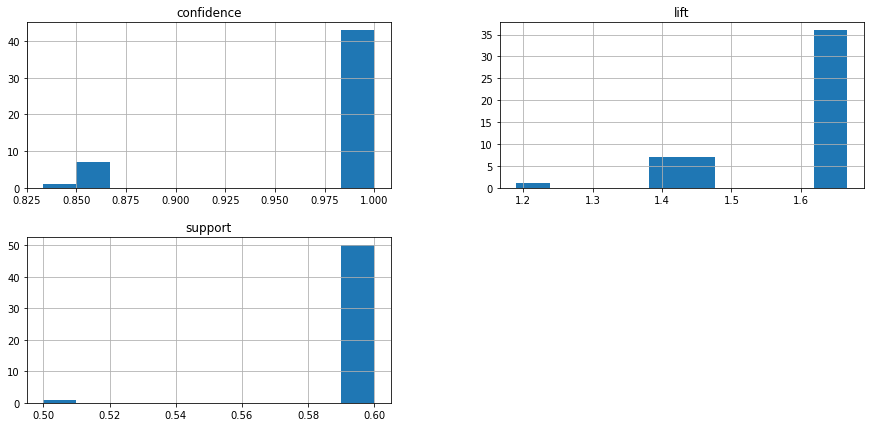

In [91]:
rules2[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

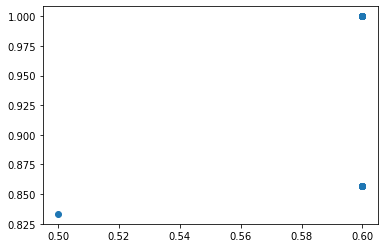

In [92]:
plt.scatter(rules2['support'], rules2['confidence'])
plt.show()

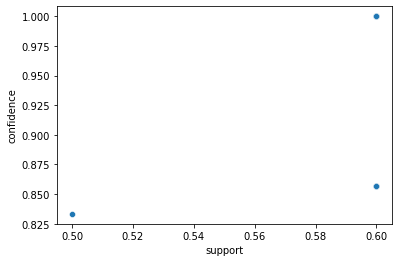

In [118]:
sns.scatterplot('support', 'confidence', data=rules2,)

plt.show()

In [94]:
rules2.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(V2_Patriot, V1_Gladiator)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
32,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
45,"(Patriot, Gladiator)","(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
26,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
27,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
28,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
29,(V1_Gladiator),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
44,"(Patriot, V1_Gladiator)","(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
31,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [95]:
rules2.shape

(51, 9)

In [96]:
rules2[rules2['confidence']>=0.8].shape

(51, 9)

### There are 51 rules with confidence greather than 0.8.

In [110]:
frequent_itemsets3 = apriori(df, min_support=0.5,max_len=3, use_colnames=True)
frequent_itemsets3.head(2)

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)


In [111]:
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(V2_Patriot, Gladiator)"
9,0.6,"(Patriot, V1_Gladiator)"


In [112]:
rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.8)
rules3
rules3.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
31,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
28,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
27,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
26,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
25,"(V2_Patriot, V1_Gladiator)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
32,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
23,(Patriot),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
22,(V2_Patriot),"(Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
21,"(Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [113]:
rules3.sort_values('confidence')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
30,(Gladiator),"(V2_Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
24,(Gladiator),"(V2_Patriot, Patriot)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
18,(Gladiator),"(Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
34,(V2_Patriot),"(Patriot, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
33,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


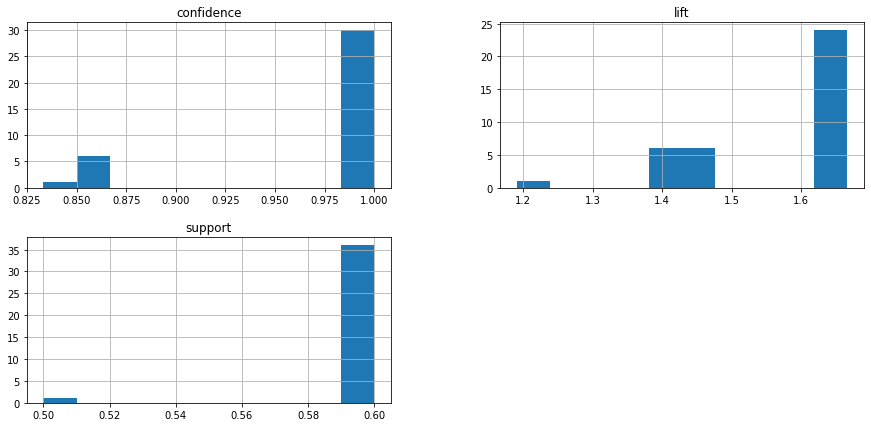

In [114]:
rules3[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

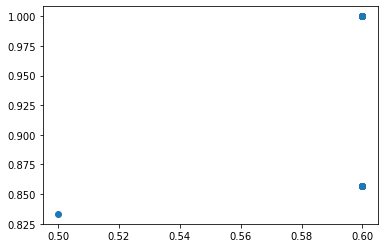

In [115]:
plt.scatter(rules3['support'], rules3['confidence'])
plt.show()

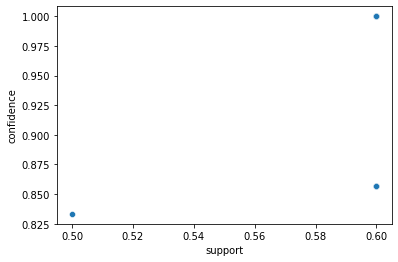

In [117]:
sns.scatterplot('support', 'confidence', data=rules3,)

plt.show()

In [119]:
rules3.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
31,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
28,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
27,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
26,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
25,"(V2_Patriot, V1_Gladiator)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
32,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
23,(Patriot),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
22,(V2_Patriot),"(Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
21,"(Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [120]:
rules3.shape

(37, 9)

### There are 37 rules with confidence greather than 0.8 and max_length is 3